HISTOGRAM

(292, 391, 3)


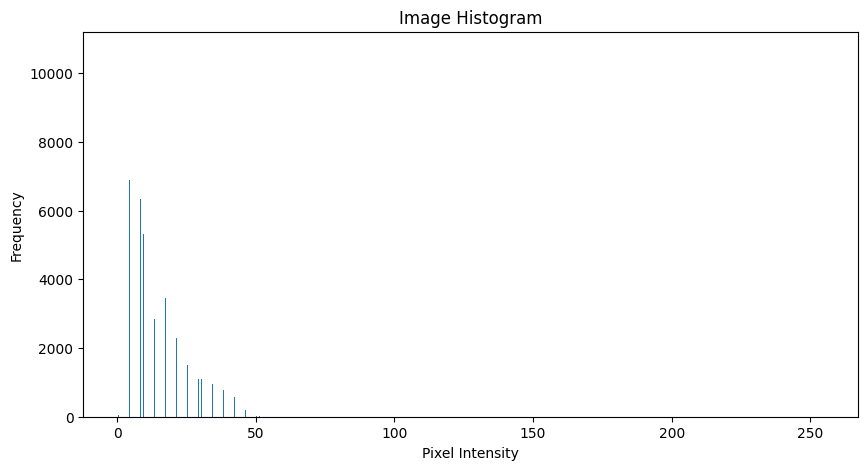

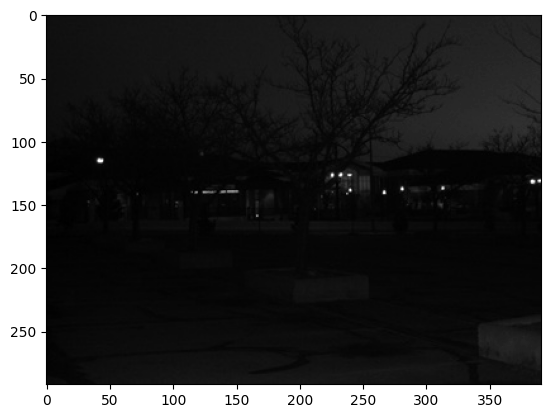

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color, exposure

# Load an image
image_path = '/content/drive/MyDrive/Images/heq.jpg'
image = io.imread(image_path)
print(image.shape)

# Convert the image to grayscale if it's in color
if len(image.shape) == 3:
    image = color.rgb2gray(image)
image=image*255

# Compute the histogram
hist, bins_center = exposure.histogram(image,nbins=256)

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.bar(bins_center, hist, width=0.1)
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
plt.imshow(image, cmap="gray")




In [ ]:
image_path = '/content/drive/MyDrive/Images/18.bmp' # Add '/content/' to the path
image = io.imread(image_path)
print(image.shape)


(307, 410, 3)


array([[14, 16, 18, ..., 10, 10, 13],
       [15, 17, 16, ..., 10, 10, 11],
       [16, 17, 19, ..., 11, 11, 11],
       ...,
       [17, 16, 17, ...,  4,  3,  3],
       [16, 18, 18, ...,  3,  3,  4],
       [15, 18, 16, ...,  4,  4,  4]], dtype=uint8)
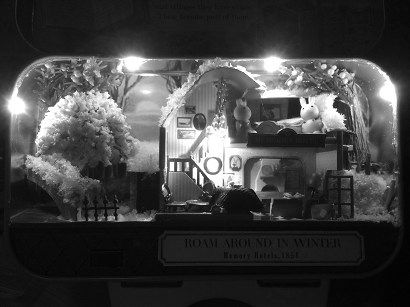

In [ ]:
image[:,:,0]

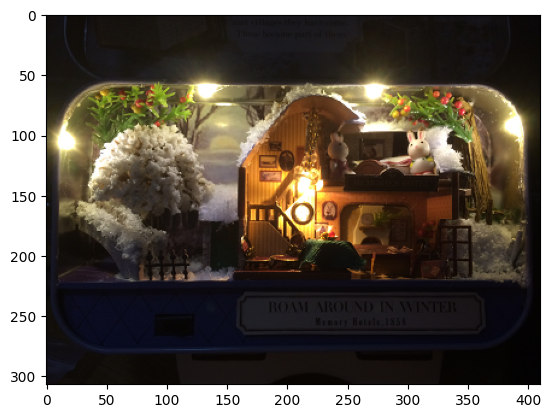

In [ ]:
plt.imshow(image)

In [ ]:
image = color.rgb2gray(image)

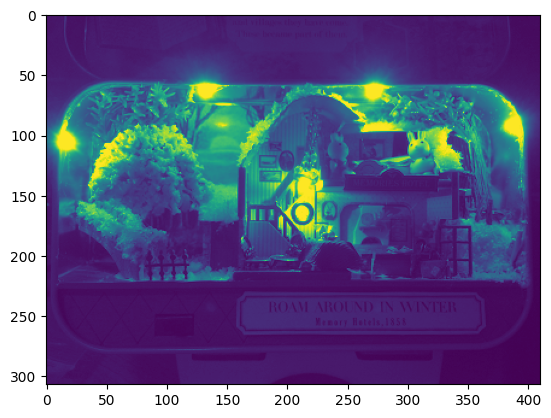

In [ ]:
plt.imshow(image)

In [ ]:
import numpy as np

In [ ]:
np.max(image)

255.0

HISTOGRAM EQUALIZATION

In [ ]:
image_eq=exposure.equalize_hist(image)

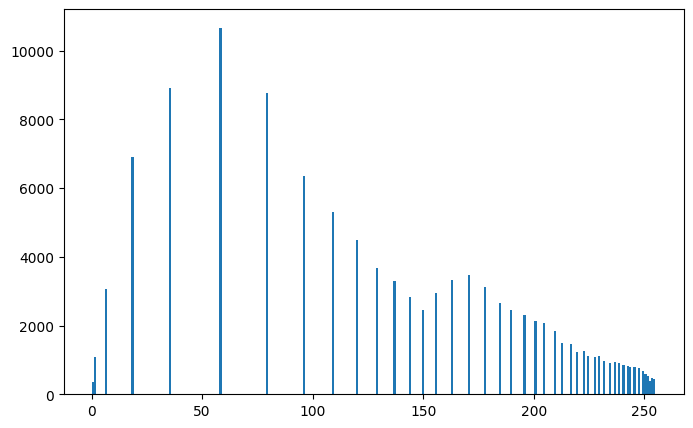

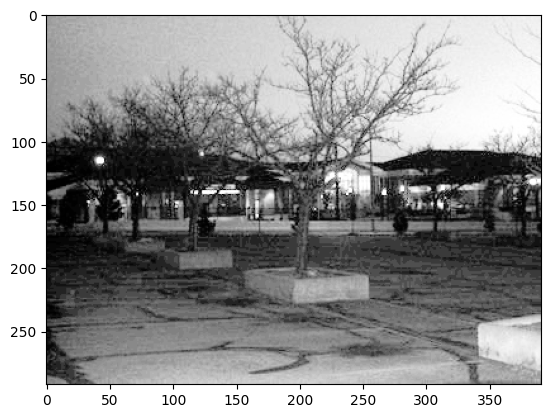

In [ ]:
hist2,bins_center=exposure.histogram(image_eq,nbins=256)
plt.figure(figsize=(8,5))
plt.bar(bins_center*255, hist2,width=1)
plt.show()
plt.imshow(image_eq, cmap="gray")

Image Negative

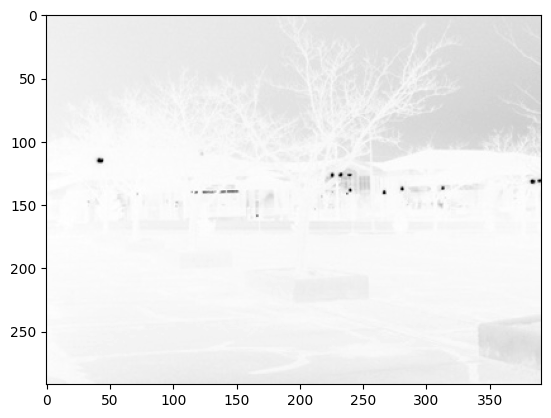

In [ ]:
image.shape
plt.imshow(255-image, cmap="gray")

In [ ]:
img_fft=io.imread("/content/drive/MyDrive/Images/fft.tif")


In [ ]:

# Gamma
gamma_corrected = exposure.adjust_gamma(img_fft, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img_fft, 1)

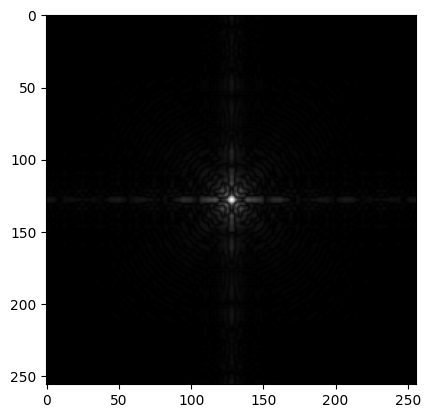

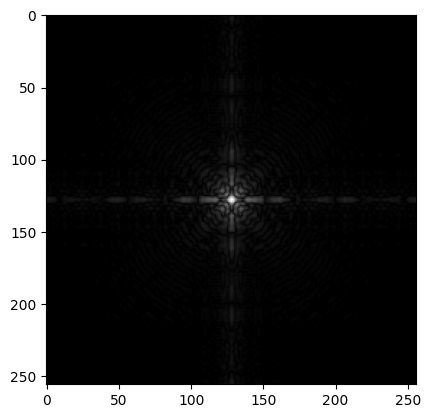

In [ ]:
plt.imshow(img_fft, cmap="gray")
plt.show()
plt.imshow(logarithmic_corrected, cmap="gray")
plt.show()

In [ ]:
from skimage import data

In [ ]:
img_moon=data.moon()

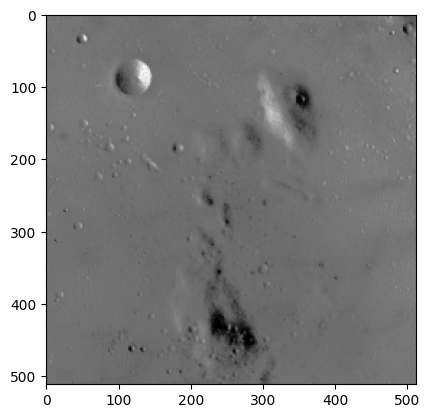

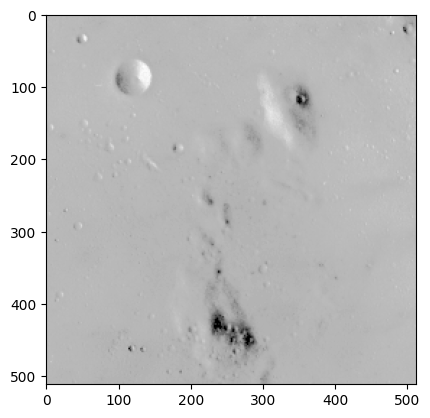

In [ ]:
plt.imshow(img_moon, cmap="gray")
plt.show()
plt.imshow(exposure.adjust_gamma(img_moon,0.4), cmap="gray")

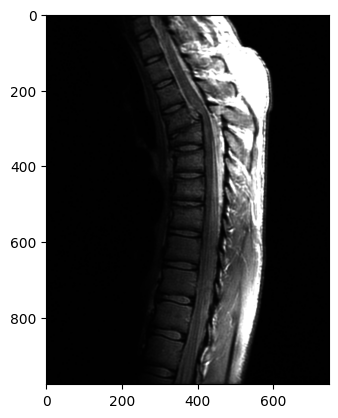

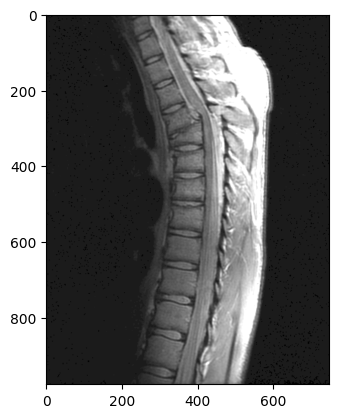

In [ ]:
img_spine=io.imread("/content/drive/MyDrive/Images/spine.tif")
plt.imshow(img_spine, cmap="gray")
plt.show()
plt.imshow(exposure.adjust_gamma(img_spine,0.4), cmap="gray")

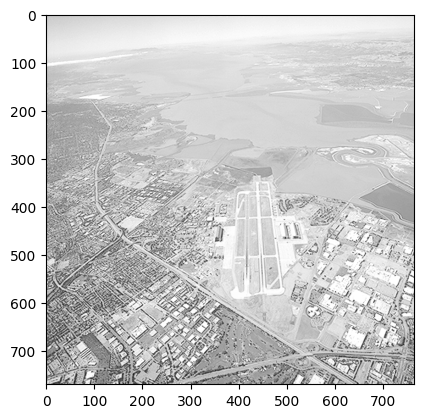

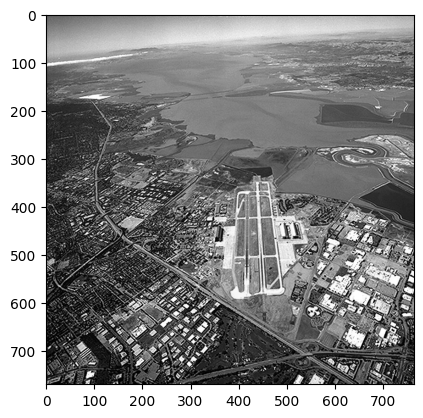

In [ ]:
img_aerial=io.imread("/content/drive/MyDrive/Images/aerial.tif")
plt.imshow(img_aerial, cmap="gray")
plt.show()
plt.imshow(exposure.adjust_gamma(img_aerial,4), cmap="gray")

SPATIAL DOMAIN FITERING

In [ ]:
from skimage import filters

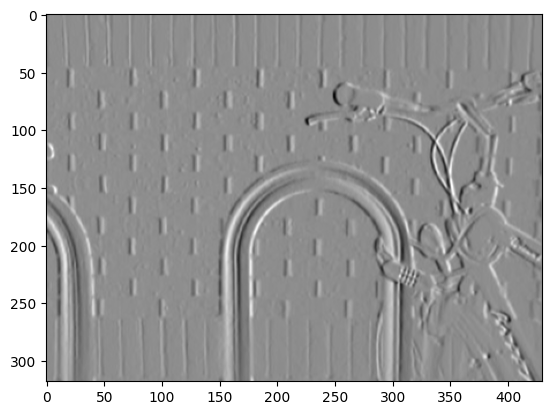

In [ ]:
img_wall=io.imread("/content/drive/MyDrive/Images/wall.jpg")
img_wall=color.rgb2gray(img_wall)
img_edge=filters.sobel_v(img_wall)
plt.imshow(img_edge, cmap="gray")

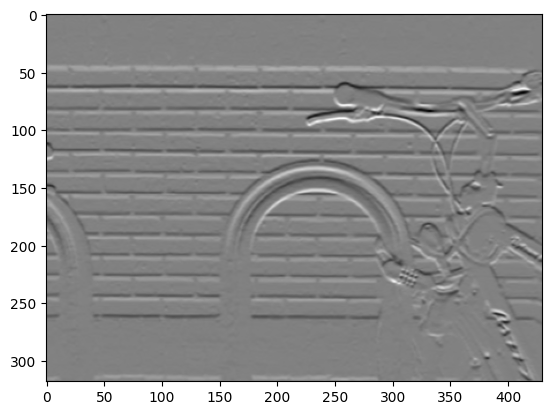

In [ ]:
img_edge=filters.sobel_h(img_wall)
plt.imshow(img_edge, cmap="gray")

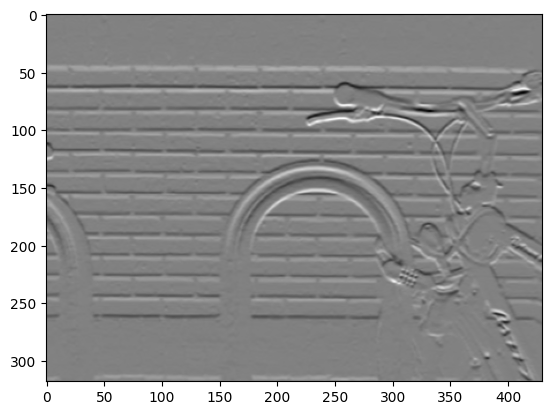

In [ ]:
rescaled_image = exposure.rescale_intensity(img_edge, out_range=(0, 255))
plt.imshow(rescaled_image, cmap="gray")

In [ ]:
np.min(rescaled_image)

0.0

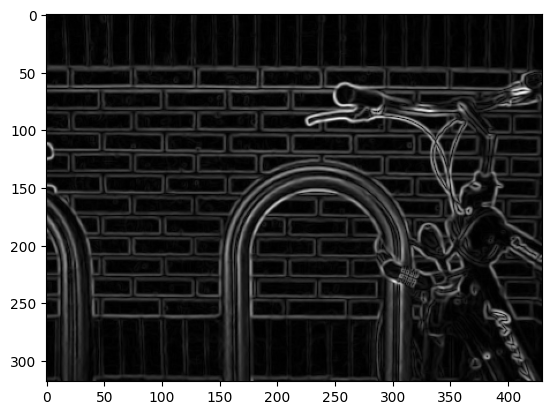

In [ ]:
img_edge=filters.sobel(img_wall)
plt.imshow(img_edge, cmap="gray")

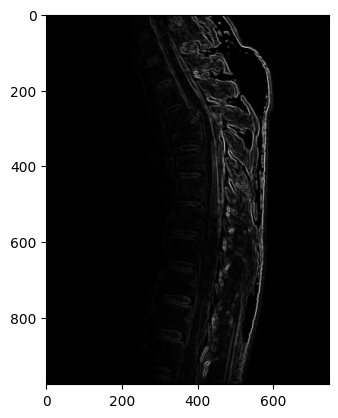

In [ ]:
img_edge=filters.sobel(img_spine)
plt.imshow(img_edge, cmap="gray")

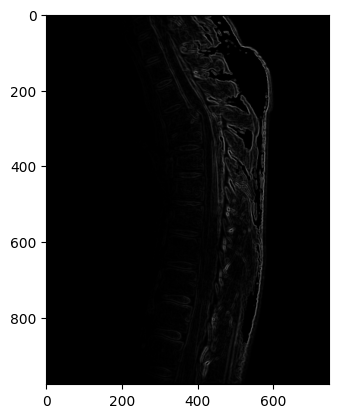

In [ ]:
img_edge=filters.roberts(img_spine)
plt.imshow(img_edge, cmap="gray")

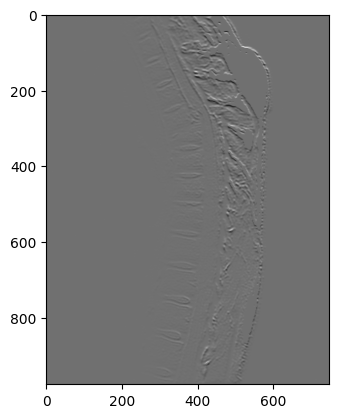

In [ ]:
img_edge=filters.sobel_h(img_spine)
plt.imshow(img_edge, cmap="gray")

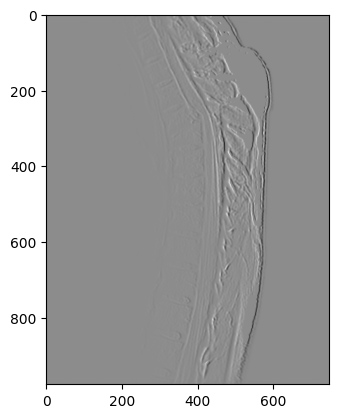

In [ ]:
img_edge=filters.sobel_v(img_spine)
plt.imshow(img_edge, cmap="gray")

Filtering with a kernel

In [ ]:
kernel=np.ones((3,3),dtype=float)*1/9
kernel


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [ ]:
# from scipy.signal import sepfir2d
# convolved = sepfir2d(data, H_r, H_c)

In [ ]:
from scipy import ndimage # for convolution


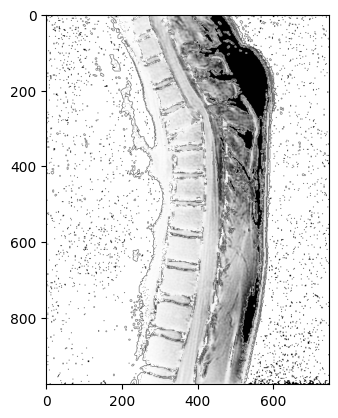

In [ ]:
# img_soft=ndimage.convolve(img_spine,kernel, mode='constant')
img_soft=ndimage.convolve(img_spine,kernel)
plt.imshow(img_soft, cmap="gray")

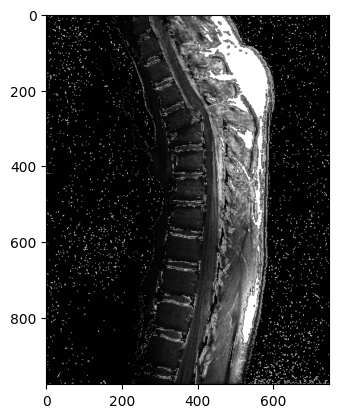

In [ ]:
kernel=np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
img_edg=ndimage.convolve(img_spine,kernel)
plt.imshow(img_edg, cmap="gray")

In [ ]:
img_letter=io.imread("/content/drive/MyDrive/Images/letter.tif")

In [ ]:
kernel=np.ones([35,35])/(35*35)
kernel=np.ones([5,5])/(5*5)
kernel=np.ones([50,50])/(50*50)
kernel

array([[0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       ...,
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004]])

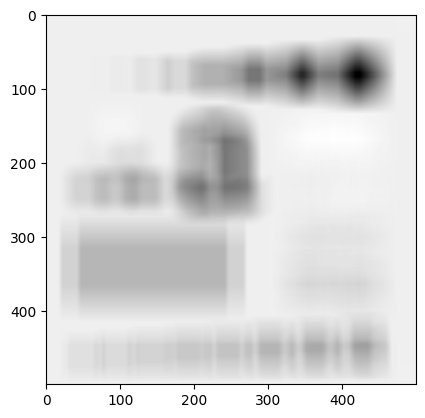

In [ ]:
img_soft=ndimage.convolve(img_letter,kernel)
plt.imshow(img_soft, cmap="gray")

In [ ]:
img_sp=io.imread("/content/drive/MyDrive/Images/noisy.tif")

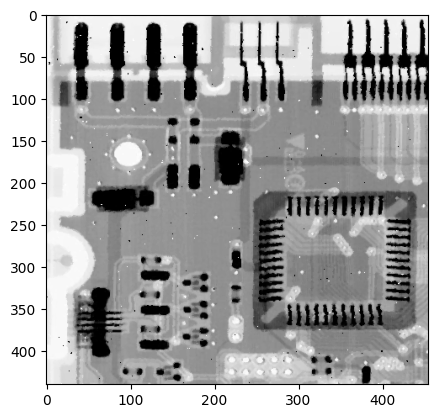

In [ ]:
img_denoise=filters.median(img_sp)
plt.imshow(img_denoise, cmap="gray")

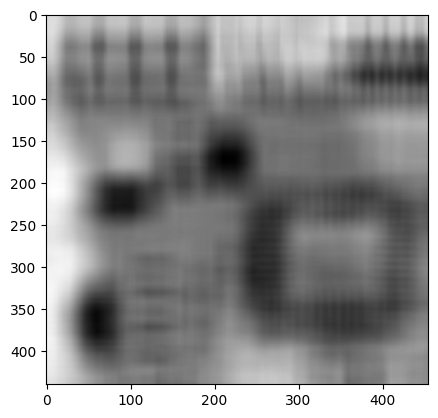

In [ ]:

img_denoise=filters.butterworth(img_sp,high_pass=False, cutoff_frequency_ratio=0.1)
kernel_soft=np.ones([3,3])/9
img_denoise=ndimage.convolve(img_sp,kernel)
plt.imshow(img_denoise, cmap="gray")